# 0. Meta

## 0.1. Modules

In [174]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns

## 0.2. Functions

In [139]:
# Function to extract the type of asset (part before the first underscore)
def extract_asset_type(asset_name):
    return asset_name.split('_')[0]

# 1. Data Import


In [140]:
# Define the path to the data file relative to the working directory
base_path = os.path.join('..', 'data', 'raw')
file_path = os.path.join(base_path, 'asset_close_prices_monthly_usd.csv')

# Load the CSV into a DataFrame
asset_prices_monthly_usd_df = pd.read_csv(file_path, index_col=0)

In [141]:
asset_prices_monthly_usd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 1996-11-01 to 2024-10-01
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   currency_chf             253 non-null    float64
 1   currency_jpy             336 non-null    float64
 2   currency_eur             251 non-null    float64
 3   govbond_usa              183 non-null    float64
 4   govbond_japan            130 non-null    float64
 5   govbond_germany          158 non-null    float64
 6   gold                     162 non-null    float64
 7   commodity_diversified    201 non-null    float64
 8   equity_small_cap         131 non-null    float64
 9   equity_momentum          120 non-null    float64
 10  equity_value             120 non-null    float64
 11  equity_growth            201 non-null    float64
 12  equity_quality           120 non-null    float64
 13  equity_min_volatility    143 non-null    float64
 14  equity_emerging

In [143]:
# Create a new DataFrame for prices converted to EUR
asset_prices_monthly_eur_df = asset_prices_monthly_usd_df.copy()

# Replace NaN values for easier numeric operations (keep them as NaN, no string 'NA')
asset_prices_monthly_eur_df = asset_prices_monthly_eur_df.astype(float)

# Extract the EUR/USD conversion rates from the 'currency_eur' column
eur_usd_rates = asset_prices_monthly_eur_df['currency_eur']

# Create a new column 'currency_usd' representing USD converted to EUR (inverse of EUR/USD)
asset_prices_monthly_eur_df['currency_usd'] = 1 / eur_usd_rates

# Loop through each column (excluding 'currency_eur' itself)
for column in asset_prices_monthly_usd_df.columns:
    if column != 'currency_eur':
        # Convert each price to EUR by dividing by the EUR/USD rate where available
        asset_prices_monthly_eur_df[column] = asset_prices_monthly_usd_df[column] / eur_usd_rates

# Remove the 'currency_eur' column as it is no longer needed
asset_prices_monthly_eur_df = asset_prices_monthly_eur_df.drop(columns=['currency_eur'])

Save EUR-converted asset prices to CSV file.

In [144]:
# Define the path for saving the combined DataFrame as a CSV file
base_path = os.path.join('..', 'data', 'interim') 
os.makedirs(base_path, exist_ok=True)

# Define the full file path for the CSV
file_path = os.path.join(base_path, 'asset_close_prices_monthly_eur.csv') 

# Save the DataFrame to the specified path as a CSV file
asset_prices_monthly_eur_df.to_csv(file_path)

# 2. Explorative Data Analysis and preprocessing

## Create data for pre-processing

For the next steps, a duplicate of the raw data is created in order to save the changes made to the original data during the pre-processing steps.

In [145]:
df_interim = asset_prices_monthly_eur_df.copy()
df_interim

,currency_chf,currency_jpy,govbond_usa,govbond_japan,govbond_germany,gold,commodity_diversified,equity_small_cap,equity_momentum,equity_value,equity_growth,equity_quality,equity_min_volatility,equity_emerging_markets,equity_sri,equity_dividend,equity_acwi_imi,equity_large_cap,crypto_bitcoin,currency_usd
Date,,,,,,,,,,,,,,,,,,,,
1996-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,1.032895,0.005797,178.238981,6.684661,161.650908,42.237321,24.058997,94.053468,72.974448,39.560473,69.760365,63.526200,58.545581,2529.482481,138.972304,61.063872,198.012219,77.665928,58460.045720,0.93270
2024-07-01,1.048207,0.006056,179.737149,7.048954,162.868738,43.576354,22.517416,99.416865,70.802044,40.781903,66.722003,62.915633,60.696711,2493.511456,138.867413,62.855535,197.160296,75.286110,59743.730120,0.92455
2024-08-01,1.064054,0.006185,177.672147,7.030950,159.668994,44.008977,21.668879,97.071514,70.376396,39.992960,63.996869,63.325200,61.851676,2396.503904,133.810079,62.647200,191.647992,72.555039,53308.786052,0.90400


## Check scales of variables

Check for correct assignment of scales.

In [146]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 1996-11-01 to 2024-10-01
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   currency_chf             251 non-null    float64
 1   currency_jpy             251 non-null    float64
 2   govbond_usa              183 non-null    float64
 3   govbond_japan            130 non-null    float64
 4   govbond_germany          158 non-null    float64
 5   gold                     162 non-null    float64
 6   commodity_diversified    201 non-null    float64
 7   equity_small_cap         131 non-null    float64
 8   equity_momentum          120 non-null    float64
 9   equity_value             120 non-null    float64
 10  equity_growth            201 non-null    float64
 11  equity_quality           120 non-null    float64
 12  equity_min_volatility    143 non-null    float64
 13  equity_emerging_markets  124 non-null    float64
 14  equity_sri     

## Missing entries

Visualize missing values with heatmap and bar charts.

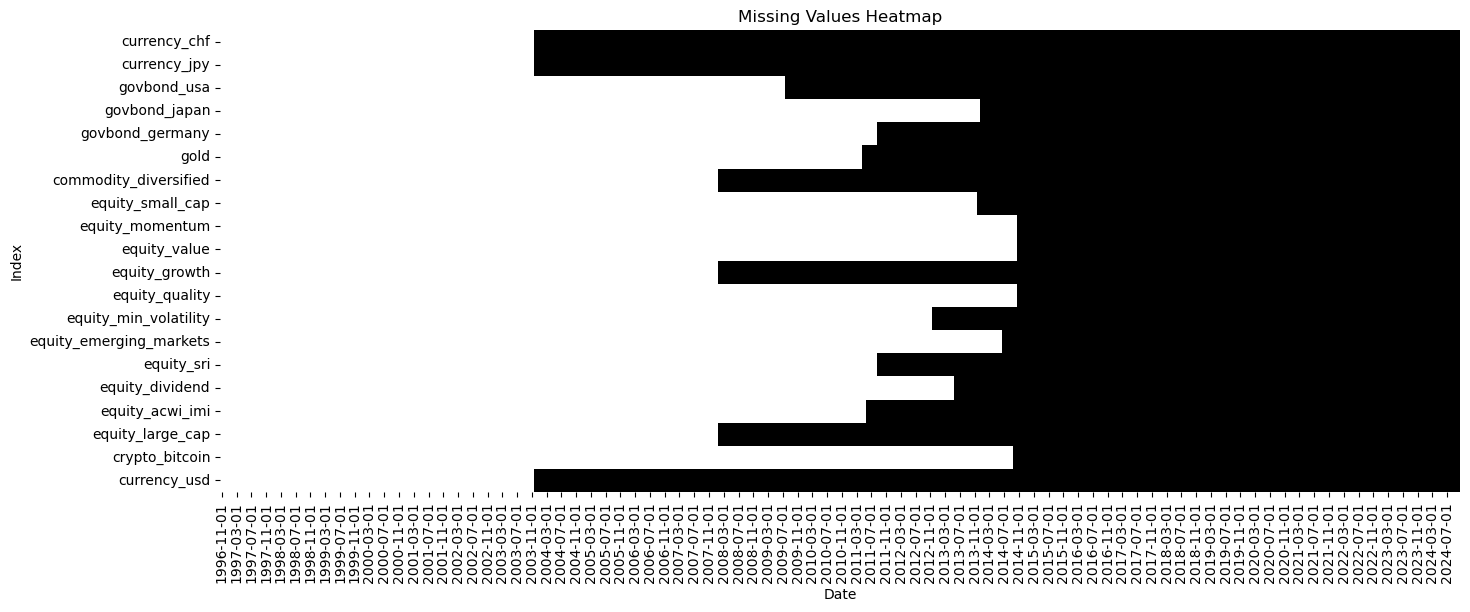

In [147]:
# Ensure that the index is a DatetimeIndex
df_interim.index = pd.to_datetime(df_interim.index)

# Create a new column from the index, as the index contains the date
df_interim['Date_str'] = df_interim.index.strftime('%Y-%m-%d')

# Create the directory if it doesn't exist
output_path = os.path.join('.', 'reports', 'figures')
os.makedirs(output_path, exist_ok=True)

# Define the file path for saving the figure
file_path = os.path.join(output_path, 'missing_entries.png')

# Visualize missing values as a heatmap
fig, ax = plt.subplots(figsize=(16, 6))

# Create the heatmap of missing values
sns.heatmap(
    df_interim.set_index('Date_str').transpose().isnull(),
    cbar=False,
    cmap=sns.color_palette(['black', 'white']),
    yticklabels=True,
    ax=ax
)

# Adjust axis titles
ax.set_title('Missing Values Heatmap')
ax.set_xlabel('Date')
ax.set_ylabel('Index')

# Save the figure
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()


Retain only rows with no missing entries.

In [148]:
# drop any rows that contain NaN and str-type values
df_interim = df_interim.drop(columns=['Date_str']).copy()

Save cleaned DataFrame to processed data directory.

In [149]:
# Define the path for saving the processed DataFrame as a CSV file
base_path = os.path.join('..', 'data', 'processed') 
os.makedirs(base_path, exist_ok=True)

# Define the full file path for the CSV
file_path = os.path.join(base_path, 'df_processed.csv') 

# Save the DataFrame to the specified path as a CSV file
df_interim.to_csv(file_path, index=False)

## Visualization of Indexes performances

Plotting Index prices over time using lineplots.

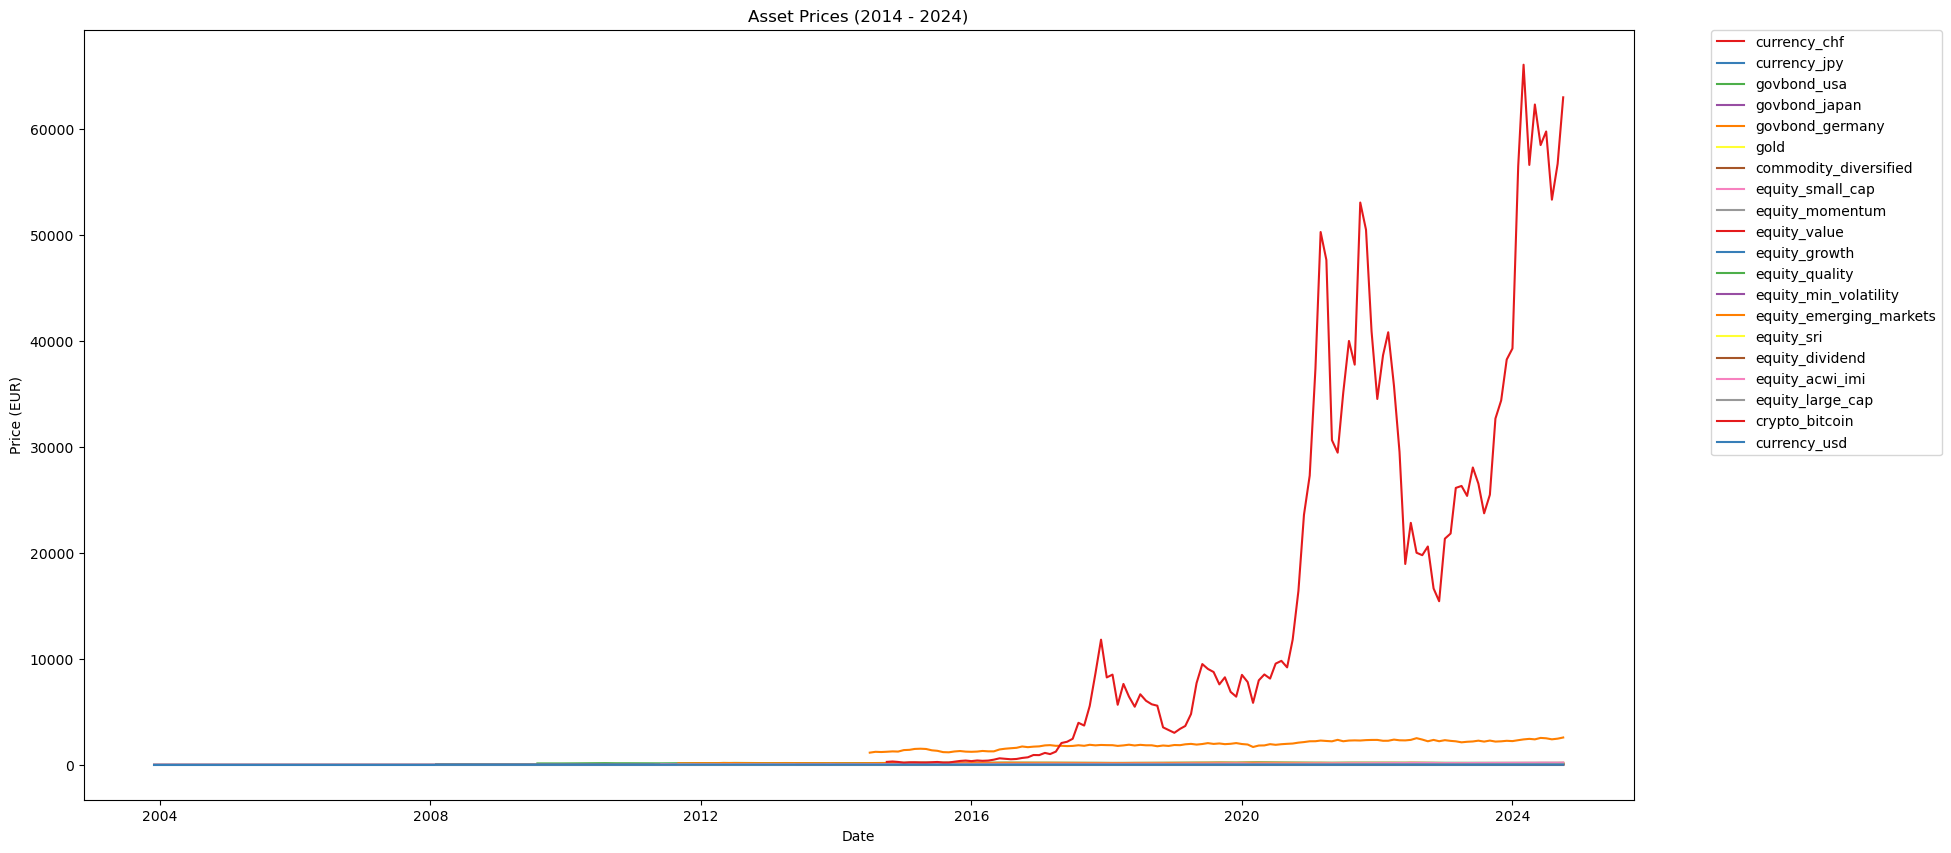

In [150]:
# Color palette for solid lines
color_palette = sns.color_palette("Set1", len(df_interim.columns))

# Create a line plot for all columns in df_interim
plt.figure(figsize=(20, 10))

for i, column in enumerate(df_interim.columns):
    sns.lineplot(x=df_interim.index, y=df_interim[column], color=color_palette[i % len(color_palette)], linestyle="-", label=column)

# Add a title, axis labels, and a legend
plt.title('Asset Prices (2014 - 2024)')
plt.xlabel('Date')
plt.ylabel('Price (EUR)')

# Create legend outside of the plot, on the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Display the plot
plt.show()


Since ranges and base values differ greatly, prices are normalized to 100 and plotted again.

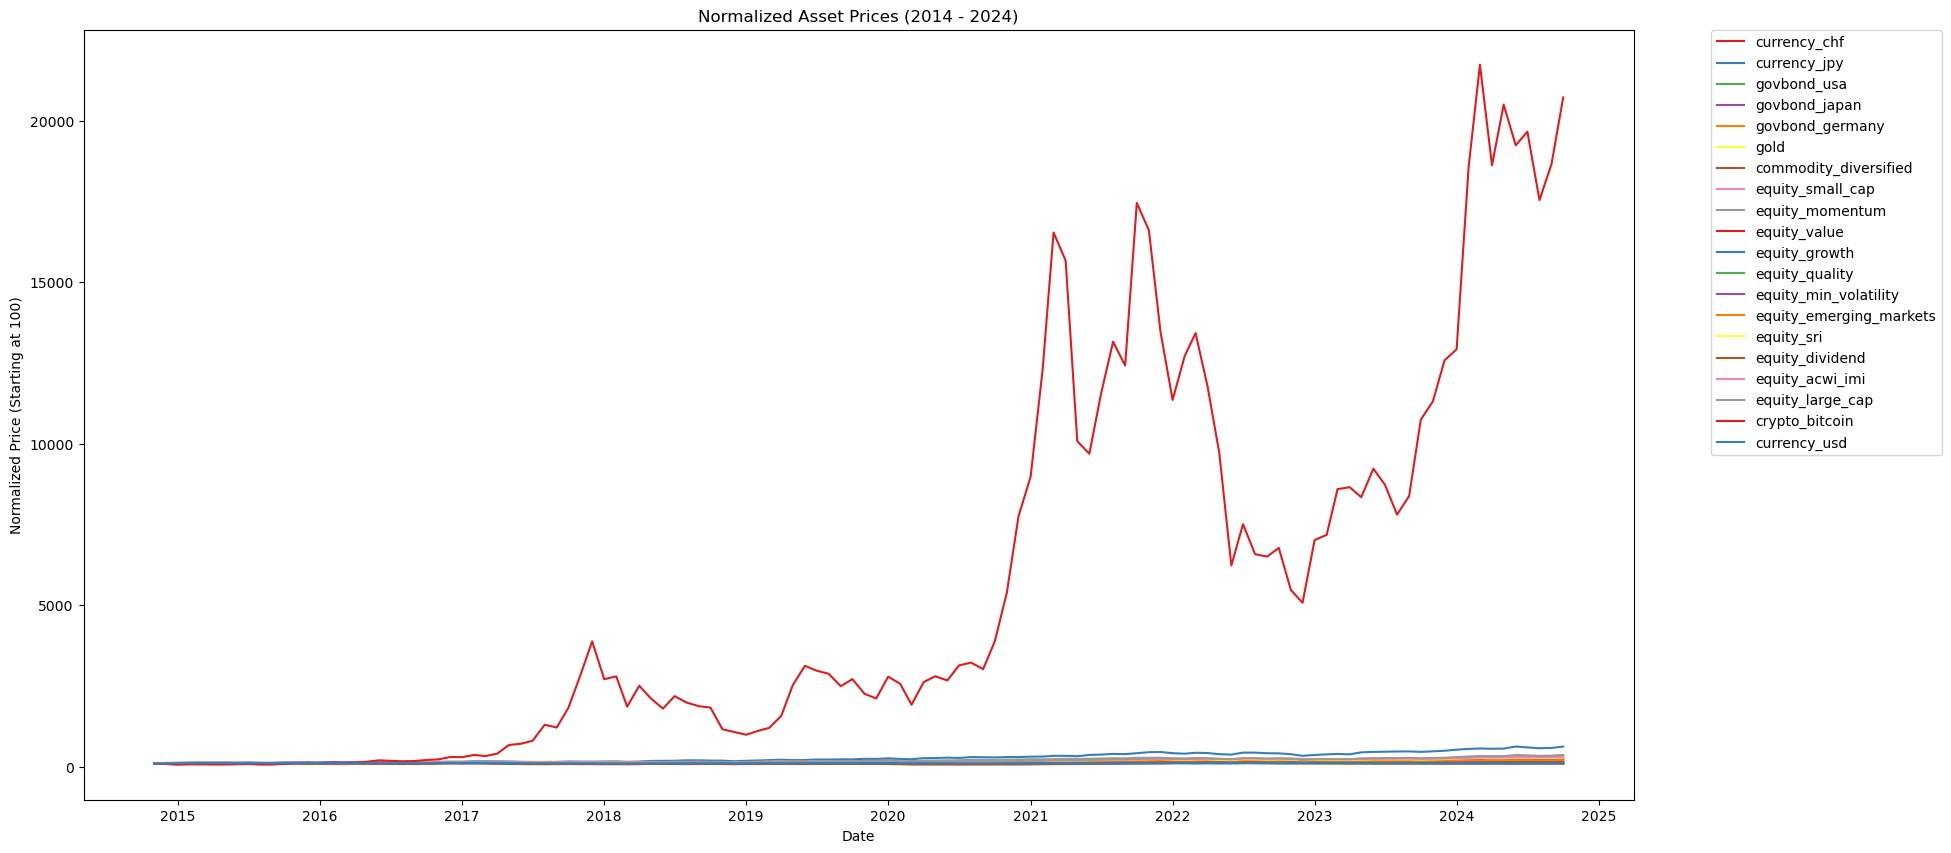

In [151]:
# Check for NaN values in the first row
if df_interim.iloc[0].isnull().any():
    print("Warning: NaN values found in the first row, which could cause issues with normalization.")

# Remove rows with NaN before normalization (or fill them with a method if appropriate)
df_normalized = df_interim.dropna().copy()

# Set the first value of each column as the baseline (100)
start_values = df_normalized.iloc[0]
df_normalized = df_normalized.div(start_values).multiply(100)

# Color palette for solid lines
color_palette = sns.color_palette("Set1", len(df_normalized.columns))

# Create a line plot for all columns in the normalized DataFrame
plt.figure(figsize=(20, 10))

for i, column in enumerate(df_normalized.columns):
    sns.lineplot(x=df_normalized.index, y=df_normalized[column], color=color_palette[i % len(color_palette)], linestyle="-", label=column)

# Add a title, axis labels, and a legend
plt.title('Normalized Asset Prices (2014 - 2024)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Starting at 100)')

# Create a legend and display it
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Display the plot
plt.show()


For better comparability, the returns are shown on a logarithmic y-axis.

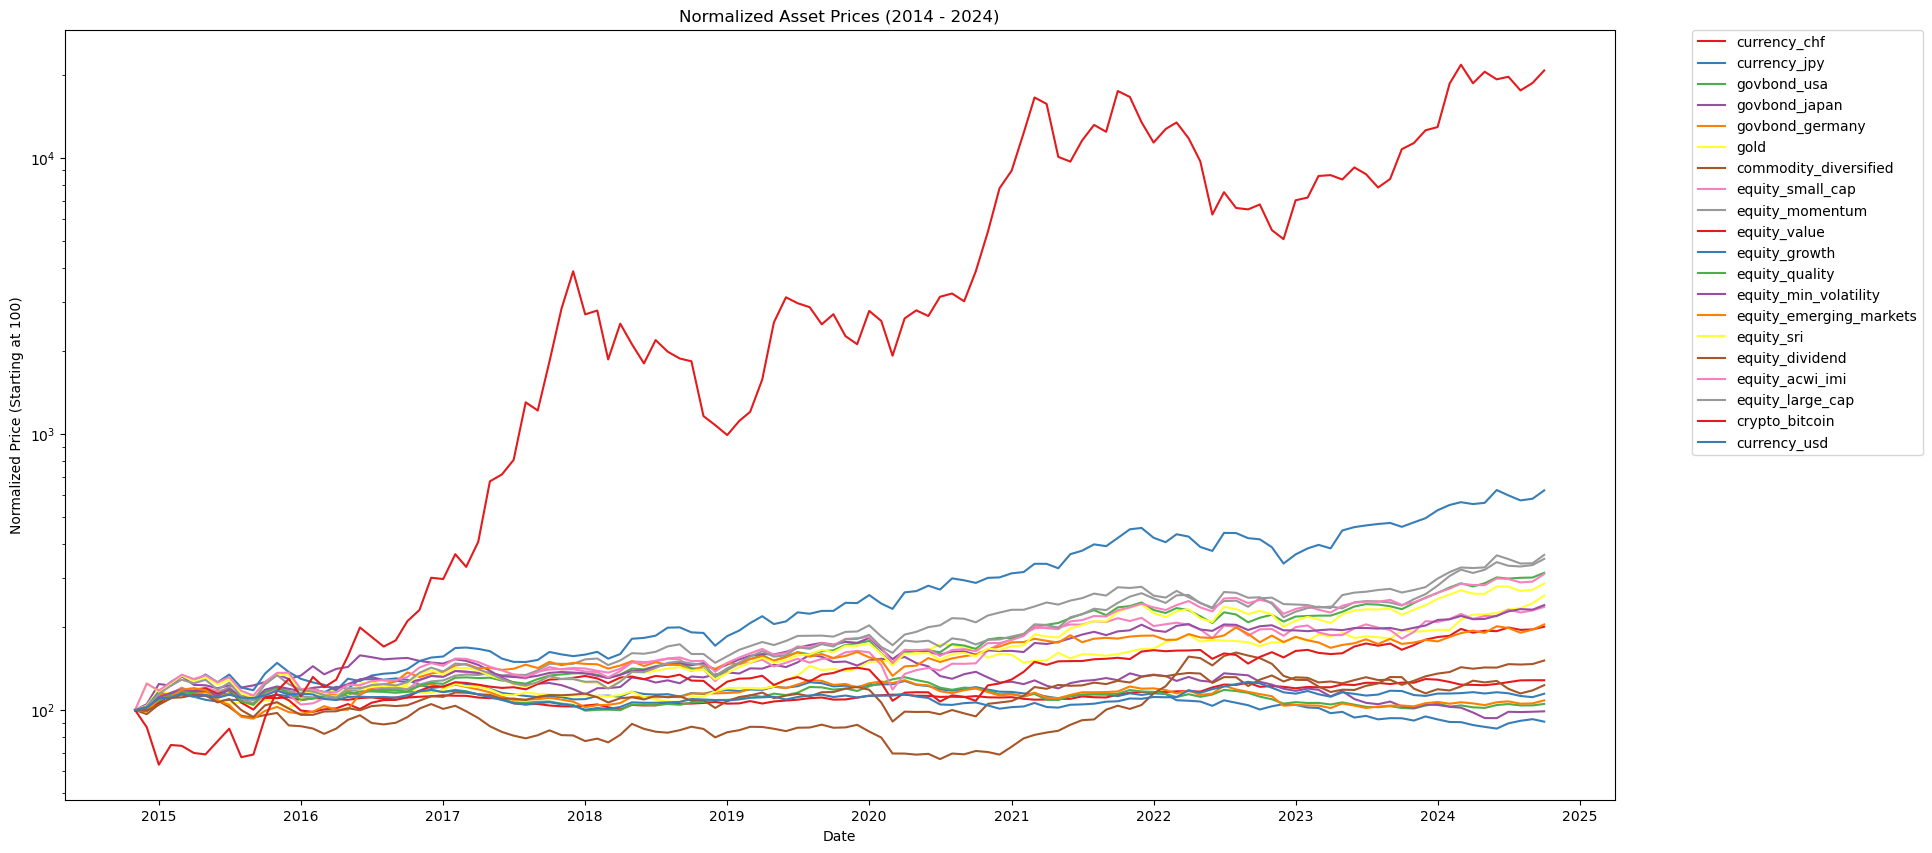

In [152]:
# Check for NaN values in the first row
if df_interim.iloc[0].isnull().any():
    print("Warning: NaN values found in the first row, which could cause issues with normalization.")

# Remove rows with NaN before normalization (or fill them with a method if appropriate)
df_normalized = df_interim.dropna().copy()

# Set the first value of each column as the baseline (100)
start_values = df_normalized.iloc[0]
df_normalized = df_normalized.div(start_values).multiply(100)

# Color palette for solid lines
color_palette = sns.color_palette("Set1", len(df_normalized.columns))

# Create a line plot for all columns in the normalized DataFrame
plt.figure(figsize=(20, 10))

for i, column in enumerate(df_normalized.columns):
    sns.lineplot(x=df_normalized.index, y=df_normalized[column], color=color_palette[i % len(color_palette)], linestyle="-", label=column)

# Add a title, axis labels, and a legend
plt.title('Normalized Asset Prices (2014 - 2024)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Starting at 100)')

# Set logarithmic scale for y-axis
plt.yscale('log')

# Create a legend and display it
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Define the path for saving the plot as a PNG file
output_path = './reports/figures/normalized_asset_prices_log.png'

# Save the plot as a PNG file
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()


Plot percentage return.

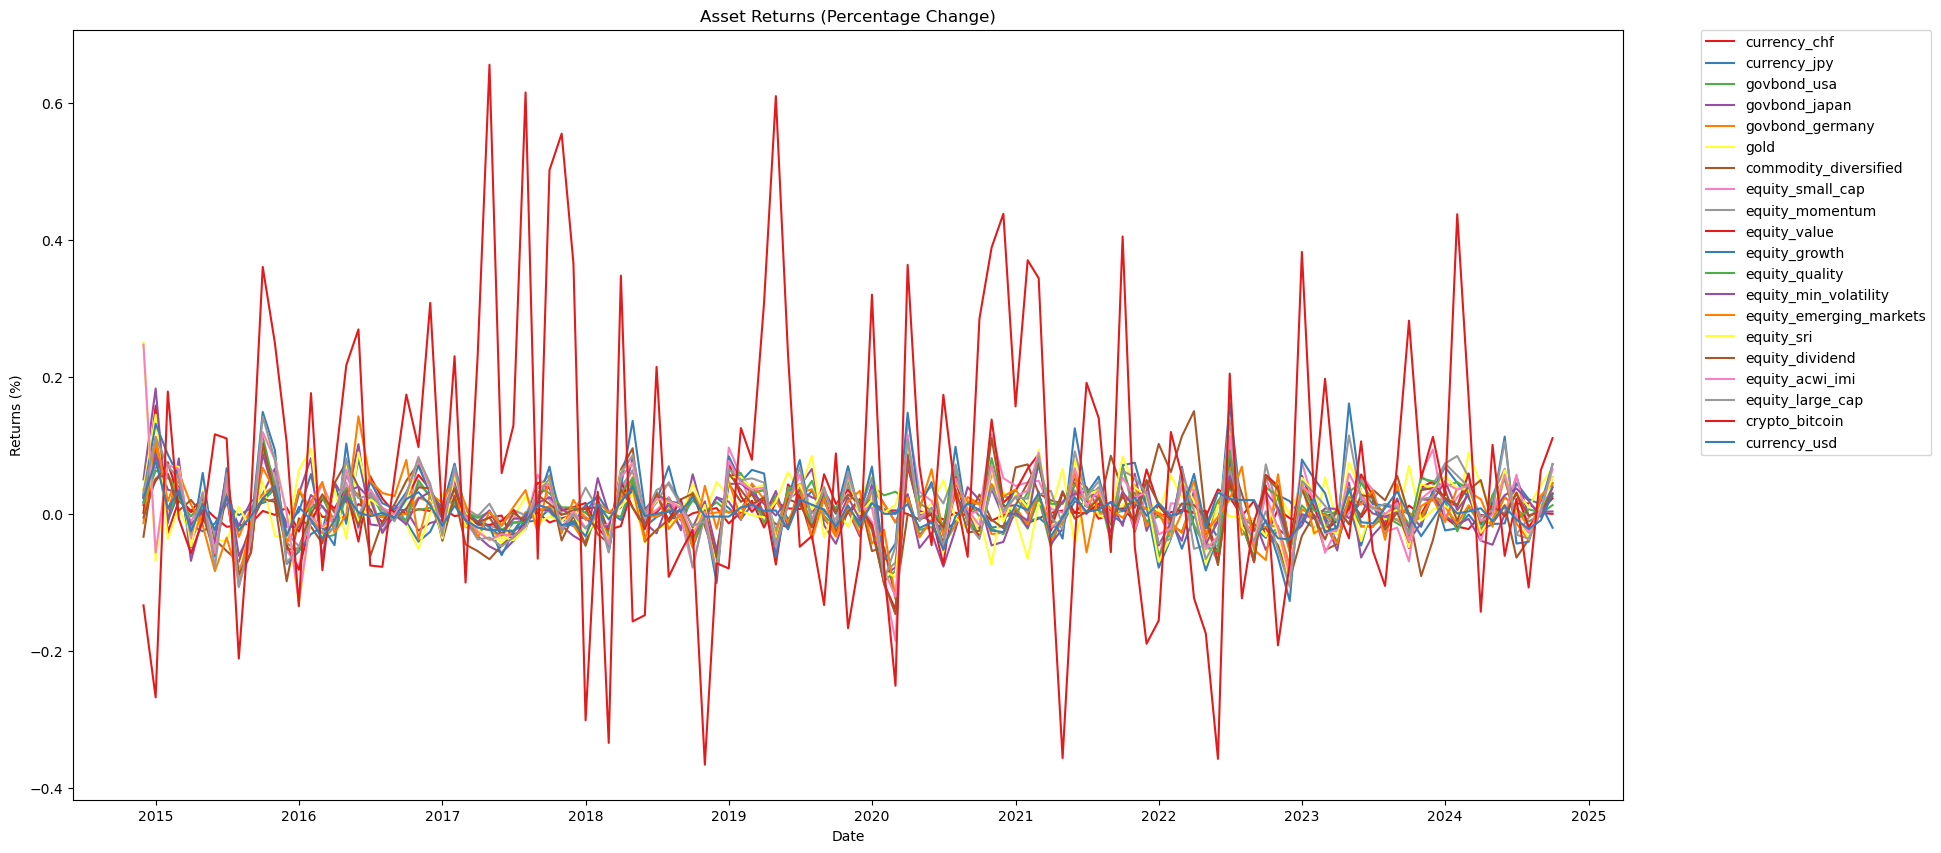

In [153]:
# Calculate percentage change for returns
df_returns = df_interim.pct_change().dropna()

# Color palette for solid lines
color_palette = sns.color_palette("Set1", len(df_returns.columns))

# Create a line plot for all columns in df_returns (percentage change)
plt.figure(figsize=(20, 10))

for i, column in enumerate(df_returns.columns):
    sns.lineplot(x=df_returns.index, y=df_returns[column], color=color_palette[i % len(color_palette)], linestyle="-", label=column)

# Add a title, axis labels, and a legend
plt.title('Asset Returns (Percentage Change)')
plt.xlabel('Date')
plt.ylabel('Returns (%)')

# Create legend and adjust the order to match the column names
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Save the plot as a PNG file
plot_path = './reports/figures/asset_returns_percentage_change.png'
plt.savefig(plot_path, bbox_inches='tight')

# Display the plot
plt.show()


## Correlation between index returns

In portfolio rebalancing, the correlation between assets plays a crucial role. Rebalancing works especially well when assets are negatively correlated or have weak positive correlations. This is because the goal of rebalancing is to benefit from diversification and counterbalance price movements. When assets move in different directions, regularly buying weaker positions and selling stronger ones can lead to more stable long-term returns and reduced risk.

To understand the relationships between asset returns, one often examines the correlations of those returns. Two common methods used for this purpose are the Pearson correlation coefficient and the Spearman correlation coefficient.

The Pearson correlation coefficient measures the linear relationship between two variables, making it particularly useful when the returns are assumed to have a linear relationship. It provides insight into the strength and direction of how two variables move together. For rebalancing, Pearson is helpful when asset returns tend to follow consistent linear patterns.

The Spearman correlation coefficient, on the other hand, measures the rank correlation and is more robust against outliers and nonlinear relationships. This is especially advantageous when the relationship between returns is not consistently linear. In the context of rebalancing, Spearman helps to identify longer-term monotonic trends that might not be visible through linear correlations.

Both methods are valuable in the rebalancing process, as they help identify both linear and nonlinear dependencies between assets. By combining insights from Pearson and Spearman correlations, investors can gain a deeper understanding of how their portfolio components interact, enabling more informed decisions when adjusting allocations.

### Correlation table

Create a table displaying Pearson and Spearman correlation coefficients between asset pairs based on returns data. The 
table includes the first asset, second asset, Pearson correlation (linear), and Spearman correlation (rank-based).

In [154]:
# Initialize an empty list to store the data for the table
correlation_data = []

# Calculate the Pearson and Spearman correlation matrices
pearson_corr = df_returns.corr(method='pearson')
spearman_corr = df_returns.corr(method='spearman')

# Iterate through each pair of assets
for i, asset1 in enumerate(df_returns.columns):
    for j, asset2 in enumerate(df_returns.columns):
        if i < j:  # Avoid duplicate pairs and self-correlation
            # Extract the Pearson and Spearman correlation values
            pearson_value = pearson_corr.loc[asset1, asset2]
            spearman_value = spearman_corr.loc[asset1, asset2]
            
            # Append the data as a row in the list
            correlation_data.append([asset1, asset2, pearson_value, spearman_value])

# Convert the list into a DataFrame for easier viewing
correlation_table = pd.DataFrame(correlation_data, columns=['First Asset', 'Second Asset', 'Pearson Correlation', 'Spearman Correlation'])

# Display the resulting table
correlation_table


,First Asset,Second Asset,Pearson Correlation,Spearman Correlation
0,currency_chf,currency_jpy,0.490174,0.343562
1,currency_chf,govbond_usa,0.521271,0.343092
2,currency_chf,govbond_japan,0.536795,0.334653
3,currency_chf,govbond_germany,0.443295,0.278401
4,currency_chf,gold,0.402321,0.311829
...,...,...,...,...
185,equity_acwi_imi,crypto_bitcoin,0.220855,0.275246
186,equity_acwi_imi,currency_usd,0.427028,0.514307
187,equity_large_cap,crypto_bitcoin,0.221376,0.256936
188,equity_large_cap,currency_usd,0.588318,0.577147


Add asset type information to correlation table. Include the asset type (extracted from the asset name) for both First Asset and Second Asset in the correlation table. This provides additional context for the correlation analysis by identifying the type of each asset (e.g., currency, equity, etc.).

In [155]:
# Initialize an empty list to store the updated data with asset types
correlation_data_with_types = []

# Iterate through the correlation table and add the asset type information
for _, row in correlation_table.iterrows():
    asset1_type = extract_asset_type(row['First Asset'])
    asset2_type = extract_asset_type(row['Second Asset'])
    
    # Append the data with asset type information
    correlation_data_with_types.append([
        row['First Asset'], 
        asset1_type, 
        row['Second Asset'], 
        asset2_type, 
        row['Pearson Correlation'], 
        row['Spearman Correlation']
    ])

# Convert the updated data into a new DataFrame with added asset type columns
correlation_table_with_types = pd.DataFrame(
    correlation_data_with_types, 
    columns=['First Asset', 'First Asset Type', 'Second Asset', 'Second Asset Type', 'Pearson Correlation', 'Spearman Correlation']
)

# Display the updated table
correlation_table_with_types.head(50)

,First Asset,First Asset Type,Second Asset,Second Asset Type,Pearson Correlation,Spearman Correlation
0,currency_chf,currency,currency_jpy,currency,0.490174,0.343562
1,currency_chf,currency,govbond_usa,govbond,0.521271,0.343092
2,currency_chf,currency,govbond_japan,govbond,0.536795,0.334653
3,currency_chf,currency,govbond_germany,govbond,0.443295,0.278401
4,currency_chf,currency,gold,gold,0.402321,0.311829
5,currency_chf,currency,commodity_diversified,commodity,0.159338,0.069869
6,currency_chf,currency,equity_small_cap,equity,0.038581,-0.019328
7,currency_chf,currency,equity_momentum,equity,0.091708,0.005156
8,currency_chf,currency,equity_value,equity,-0.036516,-0.136946
9,currency_chf,currency,equity_growth,equity,0.238295,0.106217


Save correlation table with asset types as CSV.

In [156]:
# Define the path for saving the table as a CSV file
output_path = './reports/correlation_table.csv'

# Save the DataFrame to the specified path as a CSV file
correlation_table_with_types.to_csv(output_path, index=False)

# Display confirmation message
print(f"Table saved successfully to {output_path}")

Table saved successfully to ./reports/correlation_table.csv


### Correlation heatmaps

Check pairwise pearson correlation between index series using a heatmap to display the linear relation between asset returns.

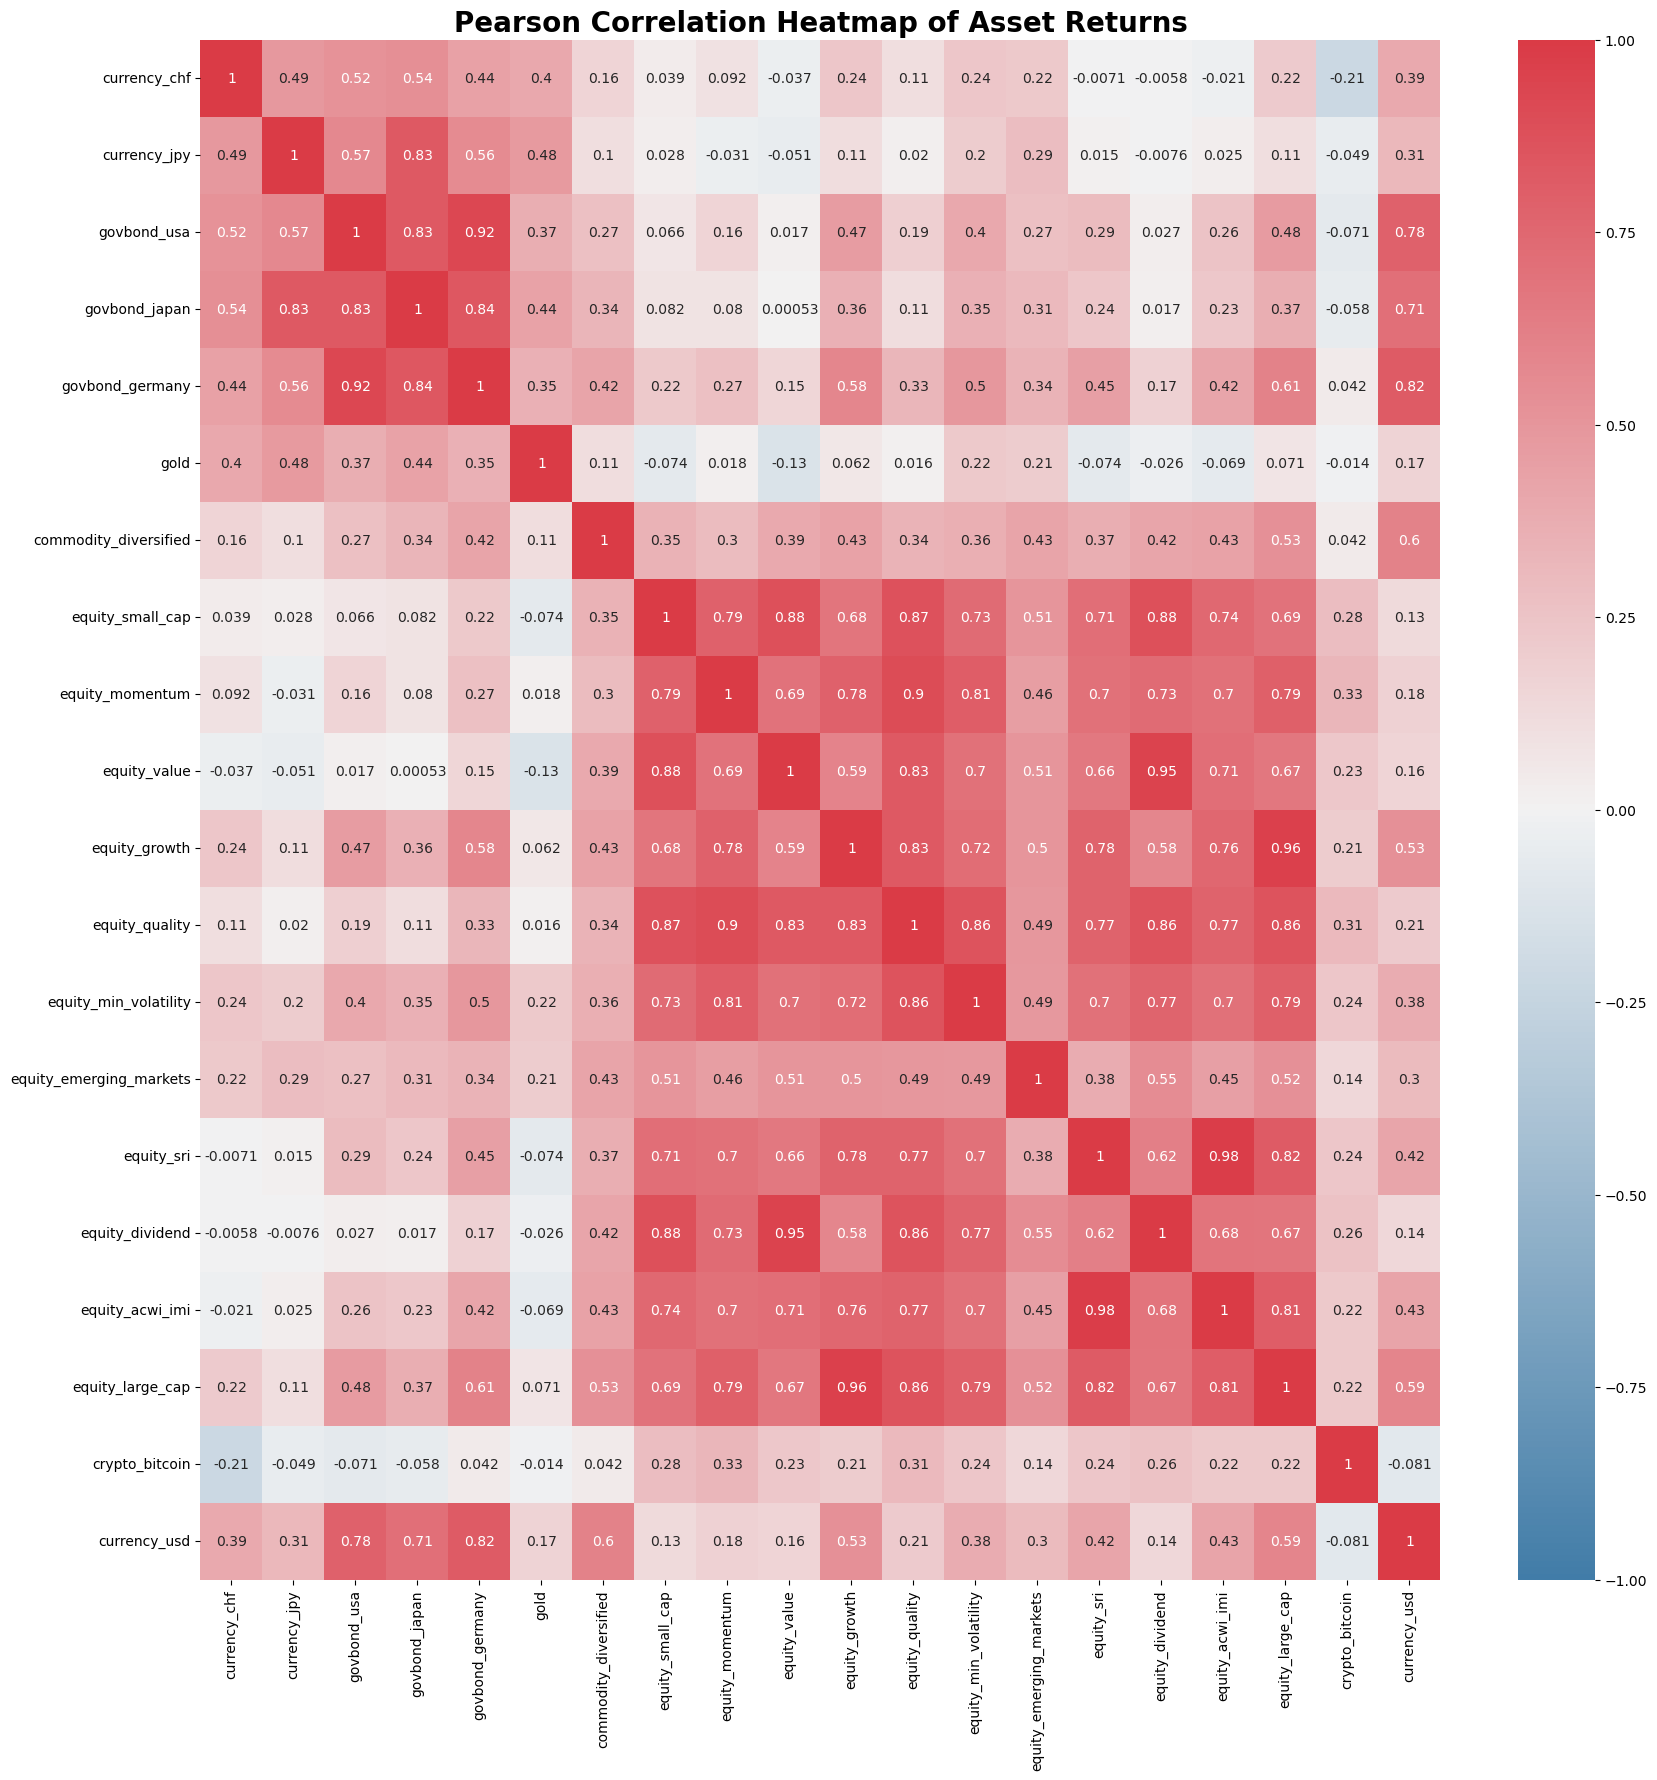

Plot saved successfully to ./reports/figures/pearson_correlation_heatmap.png


In [157]:
# Define the path for saving the plot
output_path = './reports/figures/pearson_correlation_heatmap.png'

# Calculate the Pearson correlation matrix for the returns
correlation_matrix_pearson = df_returns.corr(method='pearson')

# Define a color palette from blue to white to red for better visualization
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create the heatmap to display the Pearson correlation matrix
plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(correlation_matrix_pearson, annot=True, cmap=cmap, vmin=-1, vmax=1)  # Plot the heatmap with annotations

# Set a more descriptive and formatted title for the plot
plt.title('Pearson Correlation Heatmap of Asset Returns', fontsize=20, fontweight='bold')  

# Save the plot as a PNG file
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()

# Display confirmation message
print(f"Plot saved successfully to {output_path}")

Check pairwise spearman correlation between index series using a heatmap to display the nonlinear (rank-based) relation between asset returns.

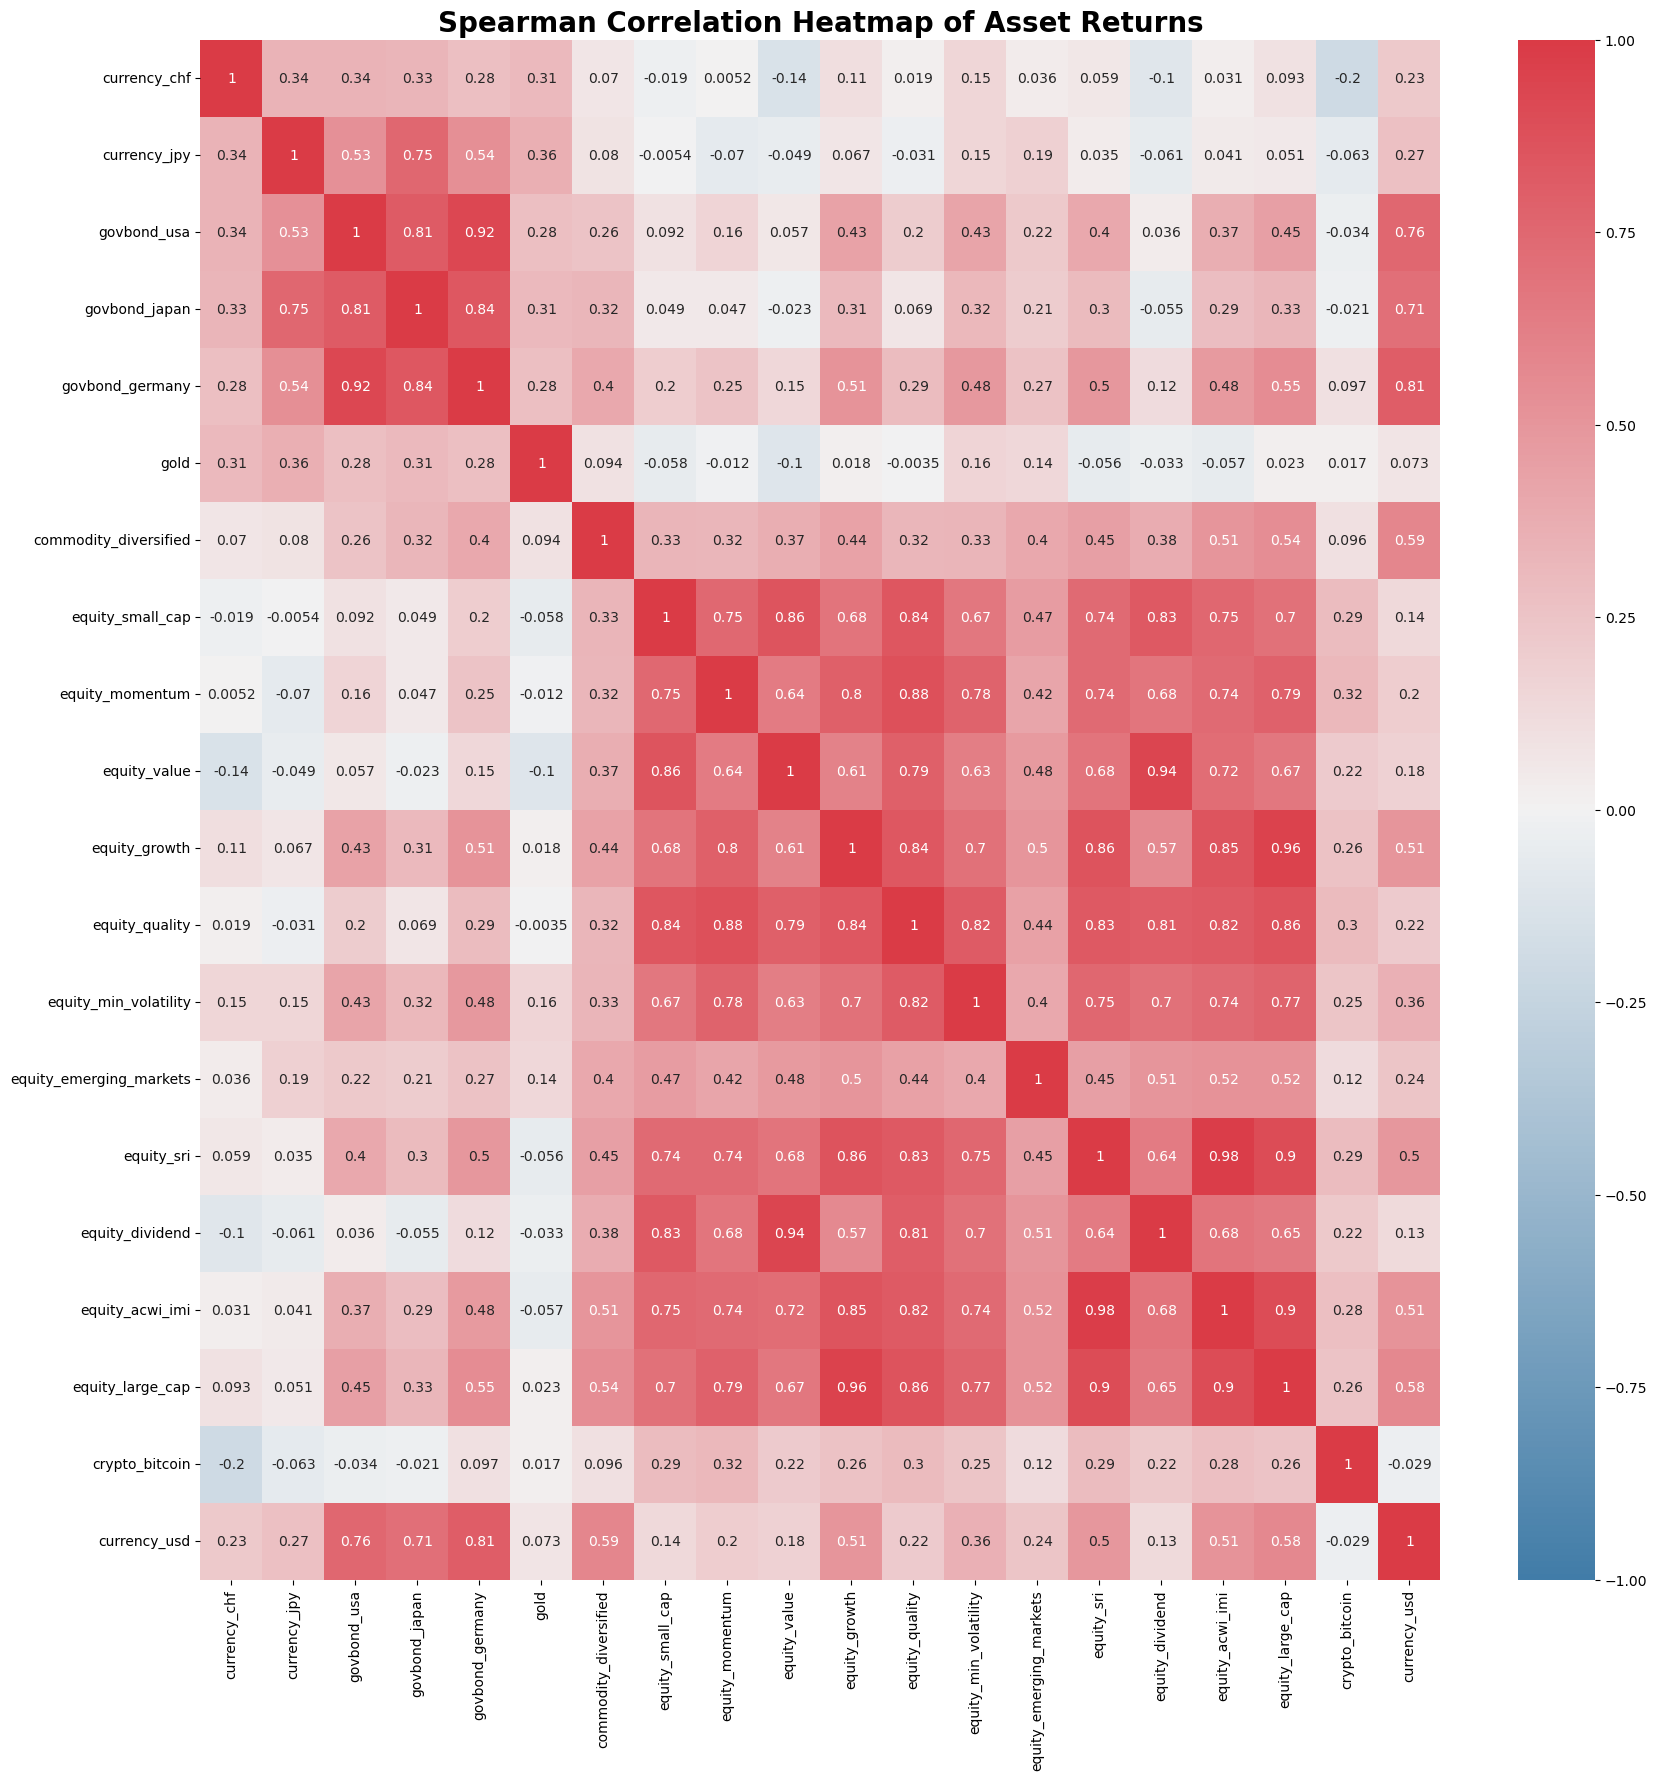

Plot saved successfully to ./reports/figures/spearman_correlation_heatmap.png


In [158]:
# Define the path for saving the plot
output_path = './reports/figures/spearman_correlation_heatmap.png'

# Calculate the Spearman correlation matrix for the returns
correlation_matrix_spearman = df_returns.corr(method='spearman')

# Define a color palette from blue to white to red for better visualization
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create the heatmap to display the Spearman correlation matrix
plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(correlation_matrix_spearman, annot=True, cmap=cmap, vmin=-1, vmax=1)  # Plot the heatmap with annotations

# Set a more descriptive and formatted title for the plot
plt.title('Spearman Correlation Heatmap of Asset Returns', fontsize=20, fontweight='bold')

# Save the plot as a PNG file
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()

# Display confirmation message
print(f"Plot saved successfully to {output_path}")


### Correlation heatmaps of Equity Returns

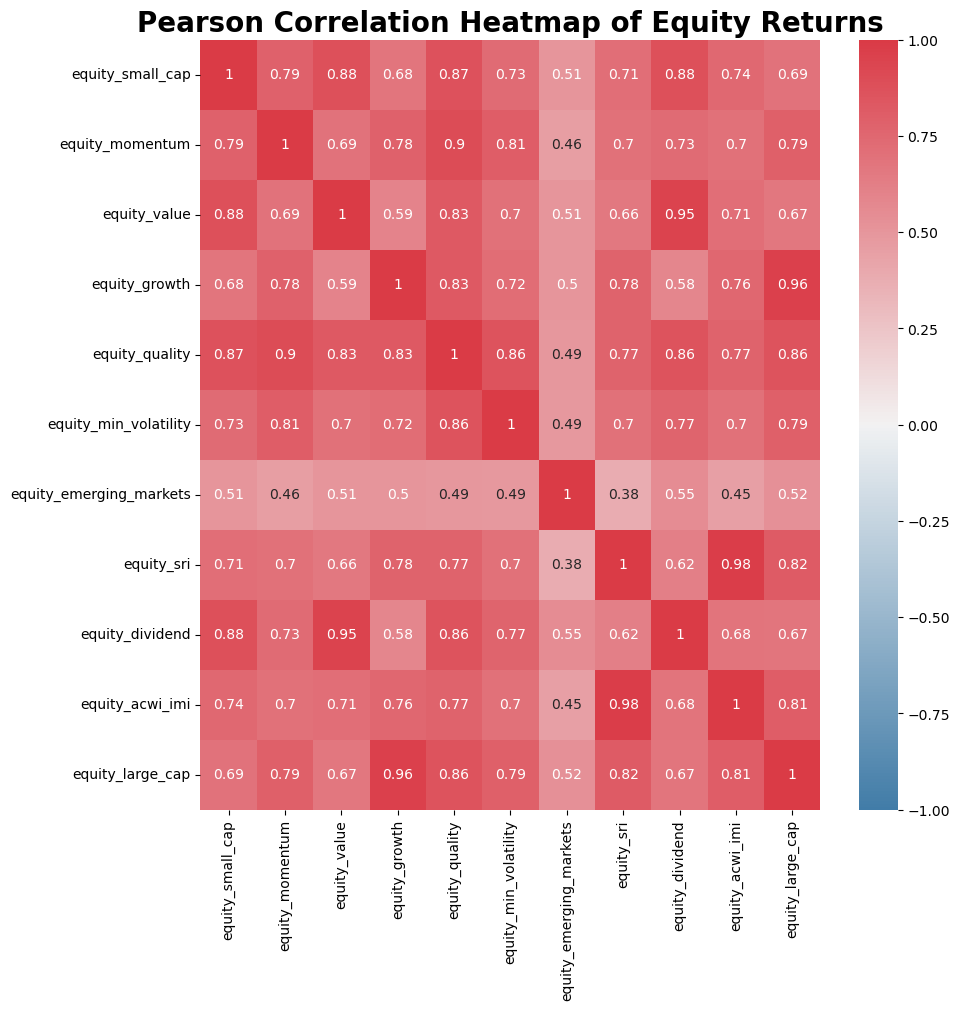

Plot saved successfully to ./reports/figures/pearson_correlation_heatmap_equity.png


In [159]:
# Define the path for saving the plot
output_path = './reports/figures/pearson_correlation_heatmap_equity.png'

# Filter the columns that start with "equity_"
equity_columns = [col for col in df_returns.columns if col.startswith('equity_')]
df_equity_returns = df_returns[equity_columns]

# Pearson correlation for equity columns
correlation_matrix_pearson_equity = df_equity_returns.corr(method='pearson')

# Define a color palette from blue to white to red for better visualization
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create the heatmap to display the Pearson correlation matrix for equities
plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(correlation_matrix_pearson_equity, annot=True, cmap=cmap, vmin=-1, vmax=1)  # Plot the heatmap with annotations

# Set a more descriptive and formatted title for the plot
plt.title('Pearson Correlation Heatmap of Equity Returns', fontsize=20, fontweight='bold')

# Save the plot as a PNG file
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()

# Display confirmation message
print(f"Plot saved successfully to {output_path}")


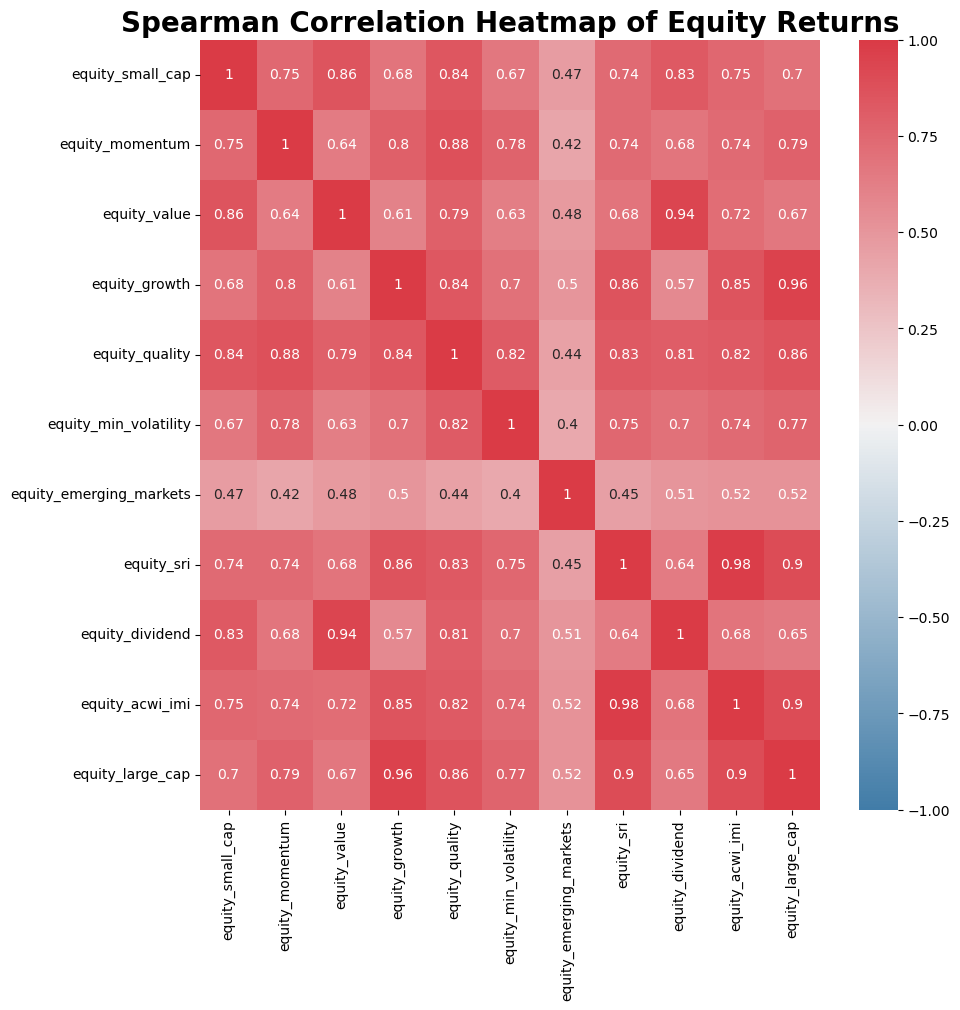

Plot saved successfully to ./reports/figures/spearman_correlation_heatmap_equity.png


In [160]:
# Define the path for saving the plot
output_path = './reports/figures/spearman_correlation_heatmap_equity.png'

# Spearman correlation for equity columns
correlation_matrix_spearman_equity = df_equity_returns.corr(method='spearman')

# Define a color palette from blue to white to red for better visualization
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create the heatmap to display the Spearman correlation matrix for equities
plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(correlation_matrix_spearman_equity, annot=True, cmap=cmap, vmin=-1, vmax=1)  # Plot the heatmap with annotations

# Set a more descriptive and formatted title for the plot
plt.title('Spearman Correlation Heatmap of Equity Returns', fontsize=20, fontweight='bold')

# Save the plot as a PNG file
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()

# Display confirmation message
print(f"Plot saved successfully to {output_path}")


### Correlation by Asset Type

In [162]:
# Step 1: Define asset types mapping
asset_types = {
    'currency_chf': 'currency', 'currency_jpy': 'currency', 'currency_usd': 'currency',
    'govbond_usa': 'govbond', 'govbond_japan': 'govbond', 'govbond_germany': 'govbond',
    'gold': 'gold', 'commodity_diversified': 'commodity',
    'equity_small_cap': 'equity', 'equity_momentum': 'equity', 'equity_value': 'equity',
    'equity_growth': 'equity', 'equity_quality': 'equity', 'equity_min_volatility': 'equity',
    'equity_emerging_markets': 'equity', 'equity_sri': 'equity', 'equity_dividend': 'equity',
    'equity_acwi_imi': 'equity', 'equity_large_cap': 'equity',
    'crypto_bitcoin': 'crypto'
}

# Step 2: Create a new column for asset type combinations
correlation_table['First Asset Type'] = correlation_table['First Asset'].map(asset_types)
correlation_table['Second Asset Type'] = correlation_table['Second Asset'].map(asset_types)

# Step 3: Combine asset types to create asset type pair feature
correlation_table['Asset Type Combination'] = correlation_table.apply(
    lambda row: f"{row['First Asset Type']} + {row['Second Asset Type']}" 
    if row['First Asset Type'] <= row['Second Asset Type'] else f"{row['Second Asset Type']} + {row['First Asset Type']}",
    axis=1
)

# Step 4: Group by asset type combination and calculate mean and standard deviation of Pearson and Spearman correlations
asset_type_grouped_corr = correlation_table.groupby('Asset Type Combination').agg(
    mean_pearson=('Pearson Correlation', 'mean'),
    std_pearson=('Pearson Correlation', 'std'),
    mean_spearman=('Spearman Correlation', 'mean'),
    std_spearman=('Spearman Correlation', 'std')
).reset_index()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14244\2128128924.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Asset Type Combination', y='mean_pearson', data=asset_type_grouped_corr_sorted_pearson,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14244\2128128924.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Asset Type Combination', y='mean_pearson', data=asset_type_grouped_corr_sorted_pearson,


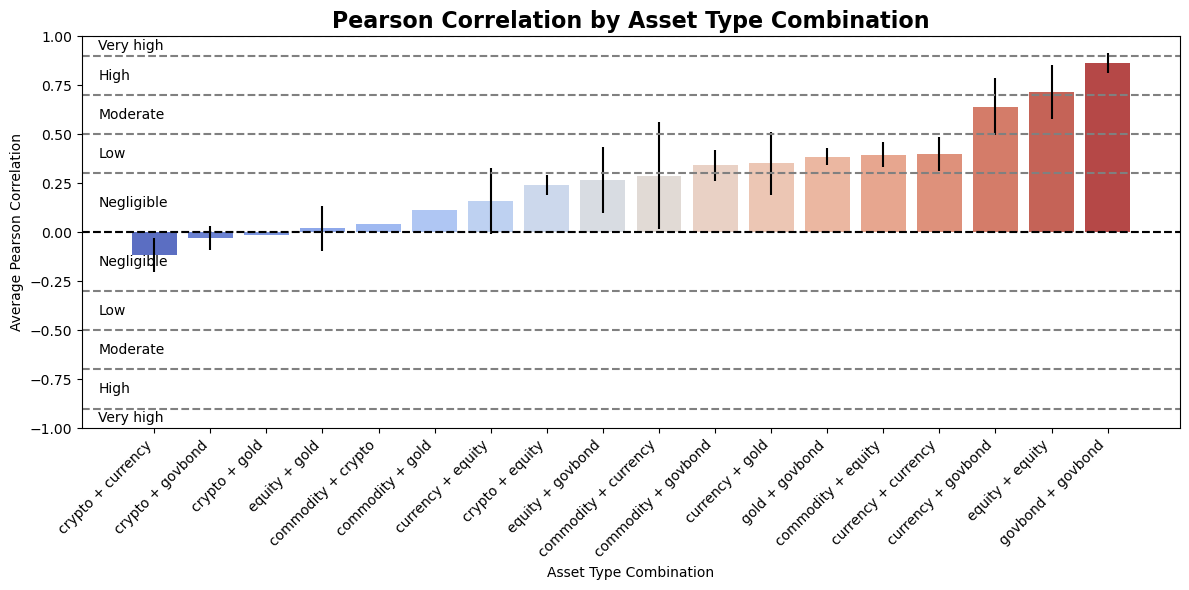

Plot saved successfully to ./reports/figures/pearson_correlation_barplot_asset_types.png


In [163]:
# Define the path for saving the plot
output_path = './reports/figures/pearson_correlation_barplot_asset_types.png'

# Step 5: Sort the data by Pearson Correlation before plotting
asset_type_grouped_corr_sorted_pearson = asset_type_grouped_corr.sort_values(by='mean_pearson')

# Step 6: Visualize the sorted Pearson correlations with error bars
plt.figure(figsize=(12, 6))
sns.barplot(x='Asset Type Combination', y='mean_pearson', data=asset_type_grouped_corr_sorted_pearson, 
            palette='coolwarm', ci=None)
plt.errorbar(x=asset_type_grouped_corr_sorted_pearson['Asset Type Combination'], 
             y=asset_type_grouped_corr_sorted_pearson['mean_pearson'], 
             yerr=asset_type_grouped_corr_sorted_pearson['std_pearson'], fmt='none', c='black')

# Add horizontal lines for the specified thresholds
thresholds = [1, 0.9, 0.7, 0.5, 0.3, 0, -0.3, -0.5, -0.7, -0.9, -1]
labels = ['Very high', 'High', 'Moderate', 'Low', 'Negligible', 
          'Negligible', 'Low', 'Moderate', 'High', 'Very high']

# Add the dashed lines and place the labels in the middle of each range
for i in range(len(thresholds) - 1):
    # Add horizontal line at threshold
    plt.axhline(thresholds[i], color='grey', linestyle='--')
    # Calculate midpoint between current and next threshold
    midpoint = (thresholds[i] + thresholds[i + 1]) / 2
    # Place label at midpoint
    plt.text(-1, midpoint, f'{labels[i]}', color='black', va='center', ha='left')

# Add the y=0 line
plt.axhline(0, color='black', linestyle='--')

# Set y-axis limits between -1 and 1
plt.ylim(-1, 1)

# Label the plot
plt.xticks(rotation=45, ha='right')
plt.title('Pearson Correlation by Asset Type Combination', fontsize=16, fontweight='bold')
plt.xlabel('Asset Type Combination')
plt.ylabel('Average Pearson Correlation')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()

# Display confirmation message
print(f"Plot saved successfully to {output_path}")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14244\3209541937.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Asset Type Combination', y='mean_spearman', data=asset_type_grouped_corr_sorted_spearman,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14244\3209541937.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Asset Type Combination', y='mean_spearman', data=asset_type_grouped_corr_sorted_spearman,


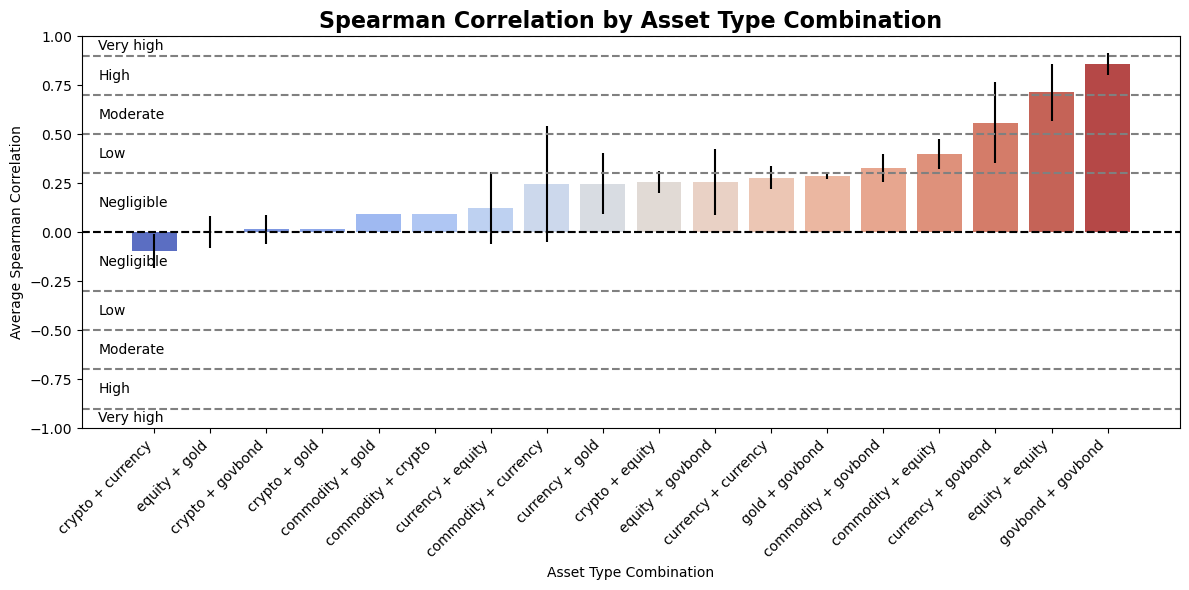

Plot saved successfully to ./reports/figures/spearman_correlation_barplot_asset_types.png


In [164]:
# Define the path for saving the plot
output_path = './reports/figures/spearman_correlation_barplot_asset_types.png'

# Step 7: Sort the data by Spearman Correlation before plotting
asset_type_grouped_corr_sorted_spearman = asset_type_grouped_corr.sort_values(by='mean_spearman')

# Step 8: Visualize the sorted Spearman correlations with error bars
plt.figure(figsize=(12, 6))
sns.barplot(x='Asset Type Combination', y='mean_spearman', data=asset_type_grouped_corr_sorted_spearman, 
            palette='coolwarm', ci=None)
plt.errorbar(x=asset_type_grouped_corr_sorted_spearman['Asset Type Combination'], 
             y=asset_type_grouped_corr_sorted_spearman['mean_spearman'], 
             yerr=asset_type_grouped_corr_sorted_spearman['std_spearman'], fmt='none', c='black')

# Add horizontal lines for the specified thresholds
thresholds = [1, 0.9, 0.7, 0.5, 0.3, 0, -0.3, -0.5, -0.7, -0.9, -1]
labels = ['Very high', 'High', 'Moderate', 'Low', 'Negligible', 
          'Negligible', 'Low', 'Moderate', 'High', 'Very high']

# Add the dashed lines and place the labels in the middle of each range
for i in range(len(thresholds) - 1):
    # Add horizontal line at threshold
    plt.axhline(thresholds[i], color='grey', linestyle='--')
    # Calculate midpoint between current and next threshold
    midpoint = (thresholds[i] + thresholds[i + 1]) / 2
    # Place label at midpoint
    plt.text(-1, midpoint, f'{labels[i]}', color='black', va='center', ha='left')

# Add the y=0 line
plt.axhline(0, color='black', linestyle='--')

# Set y-axis limits between -1 and 1
plt.ylim(-1, 1)

# Label the plot
plt.xticks(rotation=45, ha='right')
plt.title('Spearman Correlation by Asset Type Combination', fontsize=16, fontweight='bold')
plt.xlabel('Asset Type Combination')
plt.ylabel('Average Spearman Correlation')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()

# Display confirmation message
print(f"Plot saved successfully to {output_path}")

### Pie chart for equal-weighted asset type distribution

Calculation for the percentage of assets in an equally weighted portfolio.

In [166]:
# Step 1: Define asset types mapping
asset_types = {
    'currency_chf': 'currency', 'currency_jpy': 'currency', 'currency_usd': 'currency',
    'govbond_usa': 'govbond', 'govbond_japan': 'govbond', 'govbond_germany': 'govbond',
    'gold': 'gold', 'commodity_diversified': 'commodity',
    'equity_small_cap': 'equity', 'equity_momentum': 'equity', 'equity_value': 'equity',
    'equity_growth': 'equity', 'equity_quality': 'equity', 'equity_min_volatility': 'equity',
    'equity_emerging_markets': 'equity', 'equity_sri': 'equity', 'equity_dividend': 'equity',
    'equity_acwi_imi': 'equity', 'equity_large_cap': 'equity',
    'crypto_bitcoin': 'crypto'
}

# Step 2: Count the number of assets in each asset type
asset_type_counts = {}
for asset, asset_type in asset_types.items():
    if asset_type not in asset_type_counts:
        asset_type_counts[asset_type] = 0
    asset_type_counts[asset_type] += 1

# Step 3: Calculate the total number of assets
total_assets = sum(asset_type_counts.values())

# Step 4: Calculate the percentage of the portfolio in each asset type
portfolio_distribution = {asset_type: (count / total_assets) * 100 for asset_type, count in asset_type_counts.items()}

# Display the result
print("Percentage of portfolio per asset type:")
for asset_type, percentage in portfolio_distribution.items():
    print(f"{asset_type.capitalize()}: {percentage:.2f}%")


Percentage of portfolio per asset type:
Currency: 15.00%
Govbond: 15.00%
Gold: 5.00%
Commodity: 5.00%
Equity: 55.00%
Crypto: 5.00%


Visualization via pie chart.

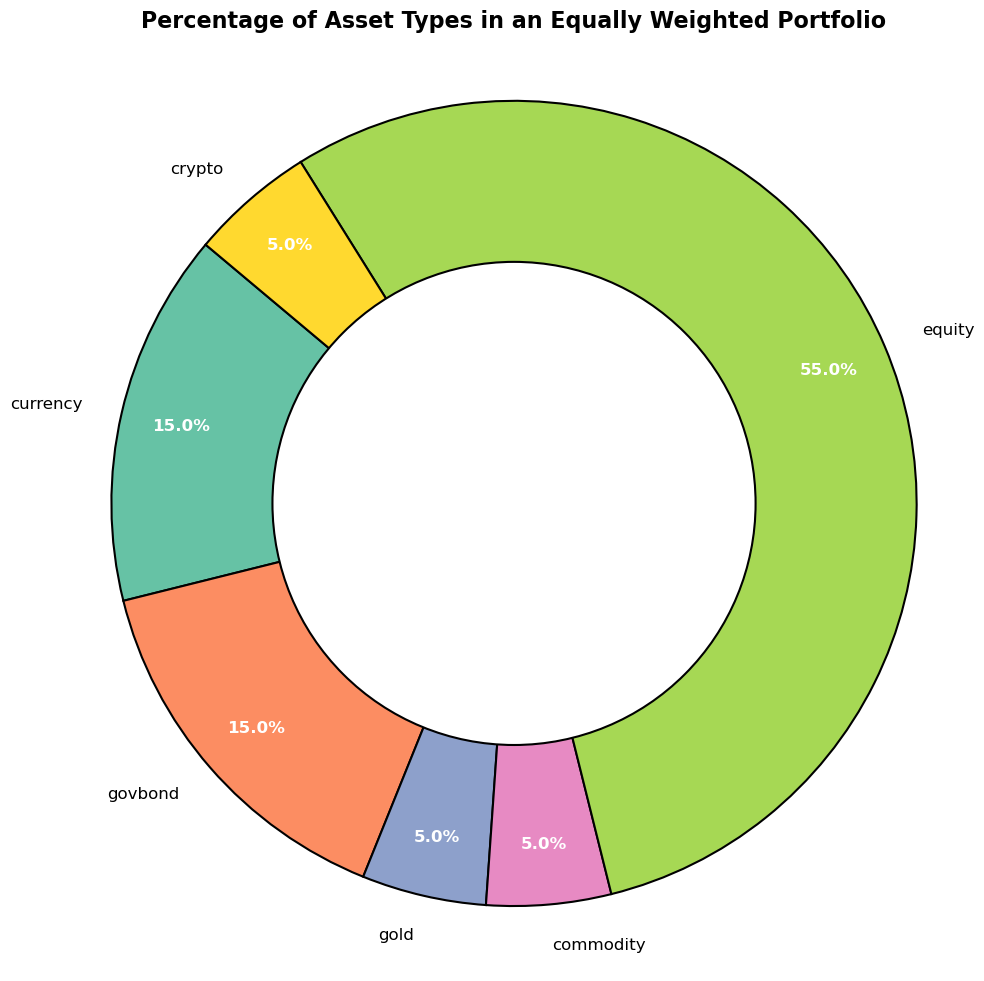

In [180]:
# Step 5: Create a pie chart for the portfolio distribution by asset type
labels = portfolio_distribution.keys()
sizes = portfolio_distribution.values()

# Set up the figure
plt.figure(figsize=(10, 10))
colors = sns.color_palette('Set2')

# Create a pie chart with additional styling for a polished look
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 14}, pctdistance=0.85
)

# Add title emphasizing equal weighting
plt.title('Percentage of Asset Types in an Equally Weighted Portfolio', fontsize=16, fontweight='bold')

# Style the text for better readability
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Draw a central circle to make it a donut chart with a black edge
centre_circle = plt.Circle((0, 0), 0.60, fc='white', edgecolor='black', lw=1.5)
plt.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a tight layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()